# Try the predict function

In [1]:
from elle_ebene.baseline_model import initialize_model
from elle_ebene.simple_preprocessing import resize_img, to_numpy_rgb, squared_imgs, normalize
from elle_ebene.params import RESIZING_DIM
import numpy as np

In [9]:
from  PIL import Image
import os
import matplotlib.pyplot as plt

In [8]:
abs_path = "/home/aymeric/code/Aymeric-B/elle_ebene/raw_data/Type 4"
valid_images = [".jpg",".jpeg",".png"]
imgs_list = []
for file in os.listdir(abs_path):
    ext = os.path.splitext(file)[1]
    if ext.lower() not in valid_images:
        continue
    img = Image.open(os.path.join(abs_path,file))
    imgs_list.append(img)

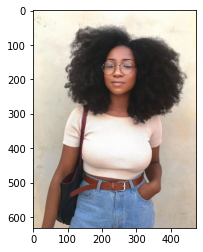

In [10]:
img = imgs_list[0]
plt.imshow(img)

In [12]:
model = initialize_model()
model.load_weights("/home/aymeric/code/Aymeric-B/elle_ebene/model_weights/baseline/weights")

clean_image = normalize(np.asarray(squared_imgs(to_numpy_rgb([resize_img(img, RESIZING_DIM)]))))


In [15]:
prediction = model.predict(clean_image)

prediction

array([[0.08773905, 0.89368844]], dtype=float32)

In [16]:
pred = np.argmax(prediction , axis = -1)[0]
if pred == 1:
    type = "type 4"
else:
    type = "type 3"
type

'type 4'